In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
!gdown '1ZxcAjoiigeKsr-X7ZusP29gfrQ6akfO8'

Downloading...
From: https://drive.google.com/uc?id=1ZxcAjoiigeKsr-X7ZusP29gfrQ6akfO8
To: /content/dogs_cats.csv
100% 95.5k/95.5k [00:00<00:00, 67.3MB/s]


In [3]:
bd = pd.read_csv('/content/dogs_cats.csv', encoding='utf-8')
bdToGraph = pd.read_csv('/content/dogs_cats.csv', encoding='utf-8')

In [4]:
del bd[bd. columns[0]]
bd.head()

,comprimento,peso,classe
0,45.231415,431.548671,cachorro
1,38.003753,517.870914,gato
2,53.608592,444.025762,cachorro
3,39.315731,524.066579,gato
4,45.581301,450.552000,cachorro


In [5]:
bd.describe()

,comprimento,peso
count,2000.000000,2000.000000
mean,45.333692,528.115349
std,6.654831,74.081920
min,25.447014,281.452391
25%,40.386562,478.410031
50%,45.508933,524.830624
75%,50.160534,575.425169
max,64.303254,786.648409


In [6]:
bd['classe'].value_counts()

cachorro    1000
gato        1000
Name: classe, dtype: int64

In [7]:
bd = np.array(bd)

Text(0, 0.5, 'Peso')

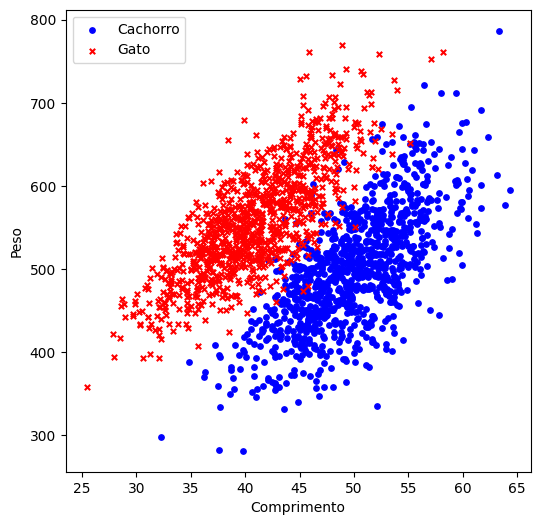

In [8]:
cachorro = bdToGraph[bdToGraph['classe'].isin(["cachorro"])]
gato = bdToGraph[bdToGraph['classe'].isin(["gato"])]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(cachorro['comprimento'], cachorro['peso'], s=15, c='b', marker='o', label='Cachorro')
ax.scatter(gato['comprimento'], gato['peso'], s=15, c='r', marker='x', label='Gato')
ax.legend()
ax.set_xlabel('Comprimento')
ax.set_ylabel('Peso')

# Método

In [9]:
def euclideanDistance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [10]:
def getNeighbors(train, test_row, num):
    distance = list()
    data = []
    for i in train:
        dist = euclideanDistance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:num]

    return neighbors

In [11]:
def predictClassification(train, test_row, num):
    Neighbors = getNeighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

In [12]:
test = np.array([30.581301, 700.552000])
prediction = predictClassification(bd, test, 4)
print("Com base nos inputs, comprimento igual a {} e peso igual a {}, predizemos ser um {}".format(test[-2], test[-1], prediction))

Com base nos inputs, comprimento igual a 30.581301 e peso igual a 700.552, predizemos ser um gato


# Métricas

In [13]:
def Evaluate(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_true)
    return acc

In [14]:
test, train = train_test_split(bd, test_size = 0.25)

In [15]:
y_pred = []
y_true = test[:, -1]
for i in test:
    prediction = predictClassification(train, i, 10)
    y_pred.append(prediction)

In [16]:
Evaluate(y_true, y_pred)

0.9453333333333334

**Acurácia de 94,53%**